# Predicting Loan Defaults for LendingClub - Research Question 2

**Research Question 2:** Which grade of loans performed the best and why?

**Aim:** The aim of this notebook is to understand which grades of loans resulted in the lowest number of defaults and the potential reasons for their high performance and low default rates. 

## Table of contents

1. Analysis of loan grades and sub-grades
2. Characteristics of loan grades.
3. Borrower characteristics of loan grades.
4. Conclusion

## Package requirements

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

## Analysis of loan grades and sub-grades

**Aim:** The aim of this section is to analyse how the loan grades and sub-grades are distributed within the defaulted and non-defaulted loans.

**Distribution of loan grades**

In [2]:
#Reading in the dataset

df = pd.read_csv('loan_analysis.csv')

In [3]:
#Extracting the counts of all the grades

df['grade'].value_counts()

B    76617
C    66309
A    42441
D    41509
E    19923
F     7986
G     2154
Name: grade, dtype: int64

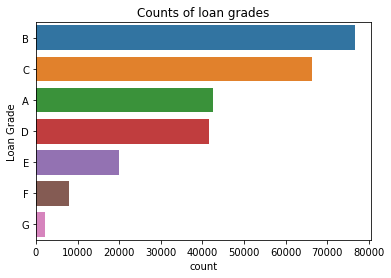

In [4]:
#Counts of the loan grades

sns.countplot(y="grade", data=df, order = df['grade'].value_counts().index)
plt.ylabel('Loan Grade')
plt.title('Counts of loan grades')
plt.show()
warnings.filterwarnings('ignore')

**Distribution of loan sub-grades**

In [5]:
#Extracting the counts of the loan sub-grades

df['sub_grade'].value_counts()

B3    18179
B4    17068
C1    15145
B2    14709
C2    14562
B5    14484
C3    12983
C4    12258
B1    12177
A5    12067
C5    11361
A4    11088
D1    10231
D2     9258
D3     8186
D4     7608
A3     7193
D5     6226
A2     6220
A1     5873
E1     4869
E2     4716
E3     3956
E4     3454
E5     2928
F1     2316
F2     1814
F3     1609
F4     1243
F5     1004
G1      730
G2      532
G3      366
G4      279
G5      247
Name: sub_grade, dtype: int64

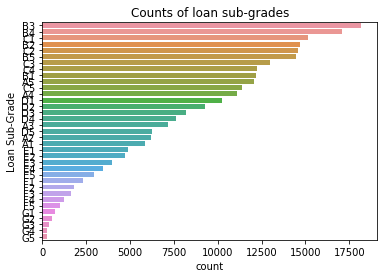

In [6]:
#Counts of the loan sub-grades

sns.countplot(y="sub_grade", data=df, order = df['sub_grade'].value_counts().index)
plt.ylabel('Loan Sub-Grade')
plt.title('Counts of loan sub-grades')
plt.show()

From the outputs produced above: 
    
- The **most popular** loan grade is **B** while the **least popular** loan grade is **G**
- The **most popular** loan sub grade is **B3** while the **least popular** loan subgrade is **G5**

**Distribution of loan grades in the defaulted and non-defaulted loans**

In [7]:
#Creating a dataframe with the defaulted loans only

df_default = df[df['default'] == 1]

#Creating a dataframe with the Not Defaulted loans only

df_nodefault = df[df['default'] == 0] 

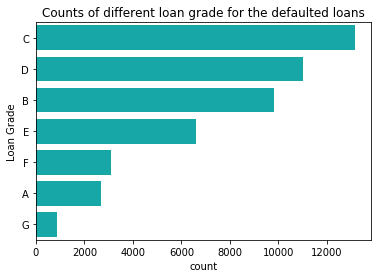

In [8]:
#Counts of the loan grades for the defaulted loans

sns.countplot(y="grade", data=df_default, order = df_default['grade'].value_counts().index, color = 'c')
plt.ylabel('Loan Grade')
plt.title('Counts of different loan grade for the defaulted loans')
plt.show()

In [9]:
#Calculating the proportion of Loan Grade within the defaulted loans

proportion_defaulted = ((df_default['grade'].value_counts())/47228) * 100
proportion_defaulted

C    27.843652
D    23.280681
B    20.754637
E    14.010756
F     6.576607
A     5.657661
G     1.876006
Name: grade, dtype: float64

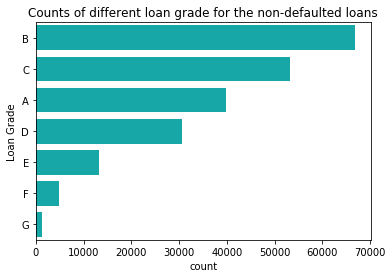

In [10]:
#Counts of the loan grades for the defaulted loans

sns.countplot(y="grade", data=df_nodefault, order = df_nodefault['grade'].value_counts().index, color = 'c')
plt.ylabel('Loan Grade')
plt.title('Counts of different loan grade for the non-defaulted loans')
plt.show()

In [11]:
#Calculating the proportion of loan purpose within the non- defaulted loans

proportion_notdefaulted = ((df_nodefault['grade'].value_counts())/209711) * 100
proportion_notdefaulted

B    31.860513
C    25.348694
A    18.963717
D    14.550500
E     6.344922
F     2.327012
G     0.604642
Name: grade, dtype: float64

From the outputs produced above: 
    
- The loan grade of **C** was the grade that had the highest number & proportion of defaults.
- The loan grade of **B** was the grade that had the highest number & proportion of non-defaults.
- Future analysis will seek to explore and understand why the loan grade of **C** had the highest number of defaults while **B** had the highest number of non-defaults.

### Characteristics of loan grades

**Aim**: The two aims of this section are as follows:

- Seek to understand why the loan grade **C** had the highest number of defaulted loans.
- Seek to understand why the loan grade of **B** had the highest number of non-defaulted loans.

In [12]:
#Creating a dataset with the loan grade C only

df_gradeC = df[df['grade'] == 'C']

#Creating a dataset with the loan grade B only

df_gradeB = df[df['grade'] == 'B']

**Comparing Loan grade B & C with respect to the interest rates**

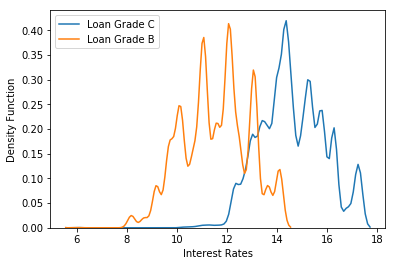

In [13]:
#Density plots of interest rates

sns.kdeplot(df_gradeC['int_rate'], label="Loan Grade C")
sns.kdeplot(df_gradeB['int_rate'], label="Loan Grade B")
plt.xlabel('Interest Rates')
plt.ylabel('Density Function')
plt.legend()
plt.show()

From the output above:

- The interest rates for the loans with a grade 'C' are between 12% to 18%.
- The interest rates for the loans with a grade 'B' are between 8% to 15%.
- From research question 1, loans with interest rates greater than 15% have a higher probability of defaults. 
- Since loans with the grade 'C' has interest rates rates that are between 15% to 18% - explains why loans with the grade 'C' has a high number of defaults.
- Since loans with a grade 'B' has interest rates that are lower that 15% - explains why loans with the grade 'B' has a low number of defaults.

**Comparing Loan grade B & C with respect to the Loan Purpose**

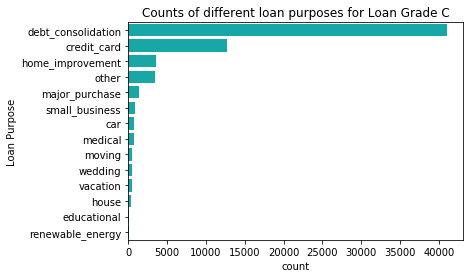

In [14]:
#Counts of the loan purpose for loan grade - C

sns.countplot(y="purpose", data=df_gradeC, order = df_gradeC['purpose'].value_counts().index, color = 'c')
plt.ylabel('Loan Purpose')
plt.title('Counts of different loan purposes for Loan Grade C')
plt.show()

In [15]:
#Calculating the proportion of Loan Purpose for loan grade - C

proportion_gradeC = ((df_gradeC['purpose'].value_counts())/66309) * 100
proportion_gradeC

debt_consolidation    61.872446
credit_card           19.229667
home_improvement       5.374836
other                  5.136558
major_purchase         2.061560
small_business         1.414589
car                    1.091858
medical                1.067728
moving                 0.689198
wedding                0.649987
vacation               0.642447
house                  0.506719
educational            0.173430
renewable_energy       0.088977
Name: purpose, dtype: float64

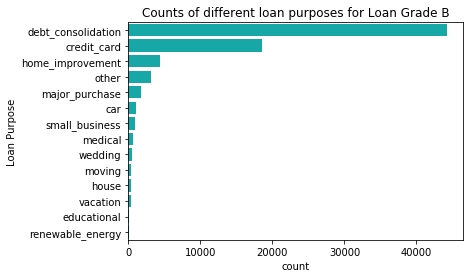

In [16]:
#Counts of the loan purpose for loan grade - B

sns.countplot(y="purpose", data=df_gradeB, order = df_gradeB['purpose'].value_counts().index, color = 'c')
plt.ylabel('Loan Purpose')
plt.title('Counts of different loan purposes for Loan Grade B')
plt.show()

In [17]:
#Calculating the proportion of Loan Purpose for loan grade - B

proportion_gradeB = ((df_gradeB['purpose'].value_counts())/76617) * 100
proportion_gradeB

debt_consolidation    57.743060
credit_card           24.237441
home_improvement       5.707611
other                  4.064372
major_purchase         2.320634
car                    1.442239
small_business         1.271258
medical                0.790947
wedding                0.676090
moving                 0.546876
house                  0.506415
vacation               0.463344
educational            0.144876
renewable_energy       0.084838
Name: purpose, dtype: float64

From the outputs above:

- Loan Grade - C, the grade with the highest number of defaults had a higher proportion of loans that were lent for the purpose of debt consolidation than loan grade - B.
- Loan Grade - B, the grade with the highest number of non-defaults had a higher proportion of loans that were lent for the purpose of credit card than loan grade - C.

**Comparing Loan grade B & C with respect to the loan amounts**

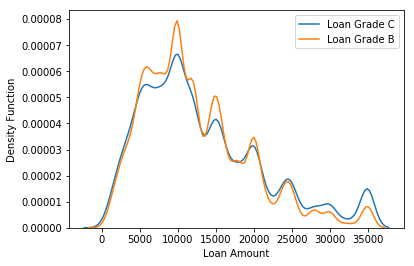

In [18]:
#Density plots of Loan Amounts

sns.kdeplot(df_gradeC['loan_amnt'], label="Loan Grade C")
sns.kdeplot(df_gradeB['loan_amnt'], label="Loan Grade B")
plt.xlabel('Loan Amount')
plt.ylabel('Density Function')
plt.legend()
plt.show()

From the outputs above:

- Loan grade - C has a higher density of loans that have an amount greater than 20,000 than loan grade - B.
- Loan grade - B has a higher density of loans that have an amount between 5,000 to 12,000 than loan grade - C.
- This indicates that higher value of loan amounts tend to default more often. 

## Borrower characteristics of loan grades

**Aim**: The aim of this section is to:

- Understand the type & characteristics of borrowers that tend to borrow loans that have a higher default rate (grade C) opposed to the type & characteristics of borrowers that tend to borrow loans that have a lower default rate (grade B).

**Comparing Loan grade B & C with respect to the Annual Income**

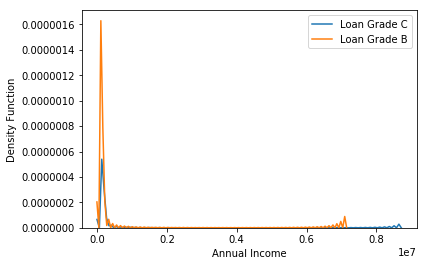

In [19]:
#Density plots of Annual Incomes of the borrowers

sns.kdeplot(df_gradeC['annual_inc'], label="Loan Grade C")
sns.kdeplot(df_gradeB['annual_inc'], label="Loan Grade B")
plt.xlabel('Annual Income')
plt.ylabel('Density Function')
plt.legend()
plt.show()

From the outputs produced above:
    
- Loan grade C has a lower density of loans in the annual income range between 0 to 80,000 while Loan grade B has a higher density of loans in the annual income range between 0 to 80,000.
- This is consistent with the behaviour of defaulted loans.

**Comparing Loan grade B & C with respect to the Home Ownership characteristics of the borrower**

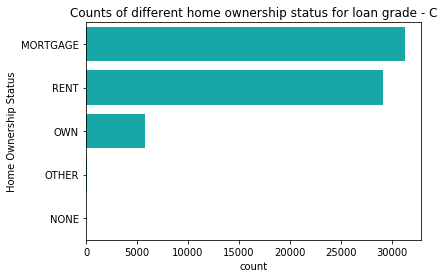

In [20]:
#Counts of the Home Owenerships for loan grade - C

sns.countplot(y="home_ownership", data=df_gradeC, order = df_gradeC['home_ownership'].value_counts().index, color = 'c')
plt.ylabel('Home Ownership Status')
plt.title('Counts of different home ownership status for loan grade - C')
plt.show()

In [21]:
#Calculating the proportion of Loan Purpose for loan grade - C

proportion_gradeC = ((df_gradeC['home_ownership'].value_counts())/66309) * 100
proportion_gradeC

MORTGAGE    47.222851
RENT        43.981963
OWN          8.713749
OTHER        0.066356
NONE         0.015081
Name: home_ownership, dtype: float64

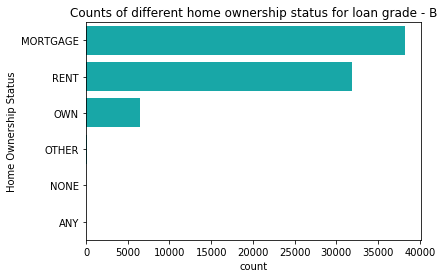

In [22]:
#Counts of the Home Owenerships for loan grade - B

sns.countplot(y="home_ownership", data=df_gradeB, order = df_gradeB['home_ownership'].value_counts().index, color = 'c')
plt.ylabel('Home Ownership Status')
plt.title('Counts of different home ownership status for loan grade - B')
plt.show()

In [23]:
#Calculating the proportion of Loan Purpose for loan grade - B

proportion_gradeB = ((df_gradeB['home_ownership'].value_counts())/76617) * 100
proportion_gradeB

MORTGAGE    49.894932
RENT        41.639584
OWN          8.379341
OTHER        0.066565
NONE         0.018273
ANY          0.001305
Name: home_ownership, dtype: float64

From the outputs produced above:
    
- Loan grade - B has a higher proportion of borrowers who have an home ownership status of - Mortgage. 
- Loan grade - C has a higher proportion of borrowers who have an home ownership status of - Rent.
- This suggests that borrowers who rent have a slightly higher chance of loans that could enter into defaults which is consistent with the behaviour of defaulted loans.

**Comparing Loan grade B & C with respect to the Employment length of the borrower**

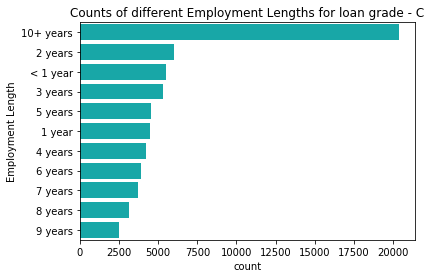

In [24]:
#Counts of the Employment Length for loan grade - C

sns.countplot(y= "emp_length", data=df_gradeC, order = df_gradeC['emp_length'].value_counts().index, color = 'c')
plt.ylabel('Employment Length')
plt.title('Counts of different Employment Lengths for loan grade - C')
plt.show()

In [25]:
#Calculating the proportion of Loan Purpose for loan grade - C

proportion_gradeC = ((df_gradeC['emp_length'].value_counts())/66309) * 100
proportion_gradeC

10+ years    30.692666
2 years       9.022908
< 1 year      8.333710
3 years       8.029076
5 years       6.864830
1 year        6.763788
4 years       6.349063
6 years       5.863457
7 years       5.555807
8 years       4.780648
9 years       3.816978
Name: emp_length, dtype: float64

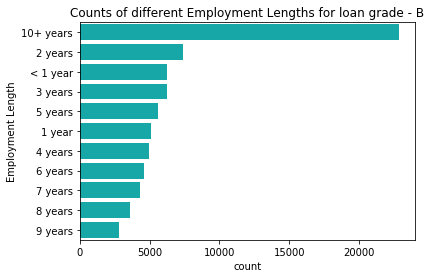

In [26]:
#Counts of the Employment Length for loan grade - B

sns.countplot(y= "emp_length", data=df_gradeB, order = df_gradeB['emp_length'].value_counts().index, color = 'c')
plt.ylabel('Employment Length')
plt.title('Counts of different Employment Lengths for loan grade - B')
plt.show()

In [27]:
#Calculating the proportion of Loan Purpose for loan grade - B

proportion_gradeB = ((df_gradeB['emp_length'].value_counts())/76617) * 100
proportion_gradeB

10+ years    29.814532
2 years       9.646684
< 1 year      8.120913
3 years       8.120913
5 years       7.271232
1 year        6.685200
4 years       6.447655
6 years       5.997364
7 years       5.633215
8 years       4.676508
9 years       3.701528
Name: emp_length, dtype: float64

From the outputs produced above:
    
- Loan's with the grade - C have a slightly higher proportion of borrowers with employment lengths that are lesser than 1 year compared to loans with a grade - B.

## Conclusion 

From the analysis conducted above the following conclusion/inferences can be drawn:

### Loan Grades & Loan sub-grades

- The **most popular** loan grade is **B** while the **least popular** loan grade is **G**
- The **most popular** loan sub grade is **B3** while the **least popular** loan subgrade is **G5**

### Loan Grades with respect to defaulted & non-defaulted loans.

- The loan grade of **C** was the grade that had the highest number & proportion of defaults.
- The loan grade of **B** was the grade that had the highest number & proportion of non-defaults.
- Future analysis will seek to explore and understand why the loan grade of **C** had the highest number of defaults while **B** had the highest number of non-defaults.

### Characteristics of Loan Grades

**Interest Rate**

- The interest rates for the loans with a grade 'C' are between 12% to 18%.
- The interest rates for the loans with a grade 'B' are between 8% to 15%.
- From research question 1, loans with interest rates greater than 15% have a higher probability of defaults. 
- Since loans with the grade 'C' has interest rates rates that are between 15% to 18% - explains why loans with the grade 'C' has a high number of defaults.
- Since loans with a grade 'B' has interest rates that are lower that 15% - explains why loans with the grade 'B' has a low number of defaults.

**Loan Status**

- Loan Grade - C, the grade with the highest number of defaults had a higher proportion of loans that were lent for the purpose of debt consolidation than loan grade - B.
- Loan Grade - B, the grade with the highest number of non-defaults had a higher proportion of loans that were lent for the purpose of credit card than loan grade - C.

**Loan Amount**

- Loan grade - C has a higher density of loans that have an amount greater than 20,000 than loan grade - B.
- Loan grade - B has a higher density of loans that have an amount between 5,000 to 12,000 than loan grade - C.
- This indicates that higher value of loan amounts tend to default more often. 

### Borrower Characteristics of Loan Grades

**Annual Income**

- Loan grade C has a lower density of loans in the annual income range between 0 to 80,000 while Loan grade B has a higher density of loans in the annual income range between 0 to 80,000.
- This is consistent with the behaviour of defaulted loans.

**Home Ownership Status**

- Loan grade - B has a higher proportion of borrowers who have an home ownership status of - Mortgage. 
- Loan grade - C has a higher proportion of borrowers who have an home ownership status of - Rent.
- This suggests that borrowers who rent have a slightly higher chance of loans that could enter into defaults which is consistent with the behaviour of defaulted loans.

**Length of Employment**

- Loan's with the grade - C have a slightly higher proportion of borrowers with employment lengths that are lesser than 1 year compared to loans with a grade - B.